## Imports

Import the DataFrames and some useful modules

In [4]:
# Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

from sklearn.metrics import r2_score, mean_squared_error

# Datasets
df_train = pd.read_csv('train.csv', index_col=0)
df_val = pd.read_csv('test_updated.csv', index_col=0)
poi = pd.read_csv('poi.csv', index_col = 0)


C:\Users\giaco\AppData\Local\Temp\ipykernel_740\467186089.py:23: DtypeWarning: Columns (7,9,11,13,17,18,19,22,23,24,25,26,28,29,30,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,77,80,82,83,84,85,86,87,90,91,92,95) have mixed types. Specify dtype option on import or set low_memory=False.
  poi = pd.read_csv('poi.csv', index_col = 0)


## Exploratory Analysis

In [5]:
df_train.head()

,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
id,,,,,,,,,,,,,,,,
10461,60000,True,Buono stato / Abitabile,1980.0,41.901300,12.700000,175.00,30.0,2.0,NaN,1.0,NaN,3.0,1.0,1.00000,35.0
51304,900000,NaN,Buono stato / Abitabile,NaN,41.907017,12.481311,NaN,NaN,3.0,NaN,1.0,1.0,NaN,3.0,1.00000,131.0
33032,33000,NaN,Buono stato / Abitabile,1960.0,41.976500,12.440500,204.20,30.0,4.0,NaN,1.0,NaN,4.0,1.0,1.00000,16.0
62281,166000,NaN,Ottimo / Ristrutturato,NaN,45.484800,12.198200,175.00,NaN,1.0,True,1.0,NaN,1.0,2.0,0.99205,100.0
45681,410000,True,Buono stato / Abitabile,NaN,45.424480,12.328622,65.91,NaN,3.0,NaN,2.0,1.0,NaN,3.0,1.00000,90.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46312 entries, 10461 to 27322
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                46312 non-null  int64  
 1   balcony              30869 non-null  object 
 2   conditions           45083 non-null  object 
 3   construction_year    32366 non-null  float64
 4   latitude             46299 non-null  float64
 5   longitude            46299 non-null  float64
 6   energy_efficiency    26409 non-null  float64
 7   expenses             30158 non-null  float64
 8   floor                44281 non-null  float64
 9   garden               14783 non-null  object 
 10  n_bathrooms          43896 non-null  float64
 11  elevator             28869 non-null  float64
 12  total_floors         27963 non-null  float64
 13  n_rooms              45959 non-null  float64
 14  proximity_to_center  46299 non-null  float64
 15  surface              45869 non-n

In [7]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,46312.0,503187.893224,1.106504e+06,154.000000,199000.0000,315000.000000,515000.000000,7.200000e+07
construction_year,32366.0,1958.032874,7.202103e+01,1000.000000,1950.0000,1967.000000,1987.000000,2.500000e+03
latitude,46299.0,43.534743,1.789416e+00,41.690300,41.8824,41.960604,45.465800,4.556130e+01
longitude,46299.0,11.451295,1.502453e+00,9.060775,9.2213,12.361864,12.487604,1.285410e+01
energy_efficiency,26409.0,5091.381613,7.600521e+05,0.010000,159.0000,175.000000,175.000000,1.234570e+08
expenses,30158.0,195.285132,4.035008e+03,0.000000,40.0000,80.000000,150.000000,3.460000e+05
floor,44281.0,2.033333,2.175668e+00,-5.000000,1.0000,2.000000,3.000000,5.600000e+01
n_bathrooms,43896.0,1.559140,7.698687e-01,1.000000,1.0000,1.000000,2.000000,9.000000e+00
elevator,28869.0,0.952510,2.126890e-01,0.000000,1.0000,1.000000,1.000000,1.000000e+00
total_floors,27963.0,5.724207,1.911152e+02,1.000000,3.0000,4.000000,6.000000,3.196000e+04


In order to make the analysis possible, encode the non-numerical values into numerical. 
   1. Garden: T/F --> OneHot
   2. Balcony: T/F --> OneHot
   3. Conditions: labels --> OrdinalEncoder
To do so, define an encode() function before proceeding with the analysis.    

In [8]:
df_train.garden.value_counts()

True    14783
Name: garden, dtype: int64

In [9]:
df_train.balcony.value_counts()

True    30869
Name: balcony, dtype: int64

In [10]:
def encode(df, istraining = False):
    
    # 1. Garden
    df['garden'] = df.garden.fillna(0)
    df['garden'] = df.garden.astype(float)        

    # 2. Balcony
    df['balcony'] = df.balcony.fillna(0)
    df['balcony'] = df.balcony.astype(float)

    # 3. Conditions
    if istraining:      # to re-apply the transformation at test time
        global enc
        enc = OrdinalEncoder().fit(df[['conditions']].fillna(df.conditions.mode()[0]))
    df['conditions'] = enc.transform(df[['conditions']].fillna(df.conditions.mode()[0]))

    return df

In [11]:
df_train = encode(df_train, istraining = True)
df_train.dtypes

price                    int64
balcony                float64
conditions             float64
construction_year      float64
latitude               float64
longitude              float64
energy_efficiency      float64
expenses               float64
floor                  float64
garden                 float64
n_bathrooms            float64
elevator               float64
total_floors           float64
n_rooms                float64
proximity_to_center    float64
surface                float64
dtype: object

Look at the percentage of null values per column and row to grasp the completeness of the data.

In [12]:
# NaN per column
df_train.isna().sum().sort_values(ascending = False) / df_train.shape[0]

energy_efficiency      0.429759
total_floors           0.396204
elevator               0.376641
expenses               0.348808
construction_year      0.301131
n_bathrooms            0.052168
floor                  0.043855
surface                0.009566
n_rooms                0.007622
latitude               0.000281
longitude              0.000281
proximity_to_center    0.000281
price                  0.000000
balcony                0.000000
conditions             0.000000
garden                 0.000000
dtype: float64

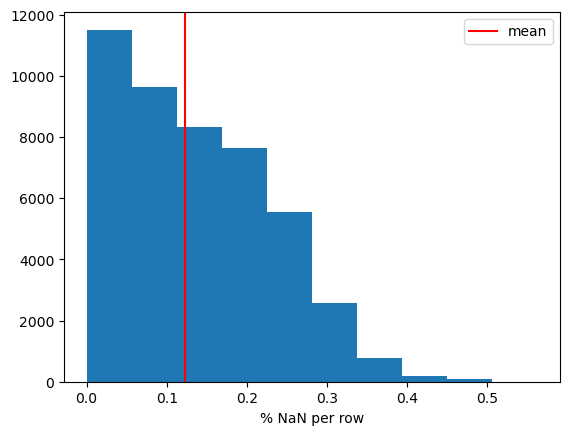

In [13]:
# NaN per row
row_nan = df_train.isna().sum(axis = 1) / df_train.shape[1]
plt.axvline(row_nan.mean(), label = 'mean', c = 'r')
plt.hist(row_nan)
plt.xlabel('% NaN per row')
plt.legend()
plt.show()

Visualize the NaNs in the whole dataset

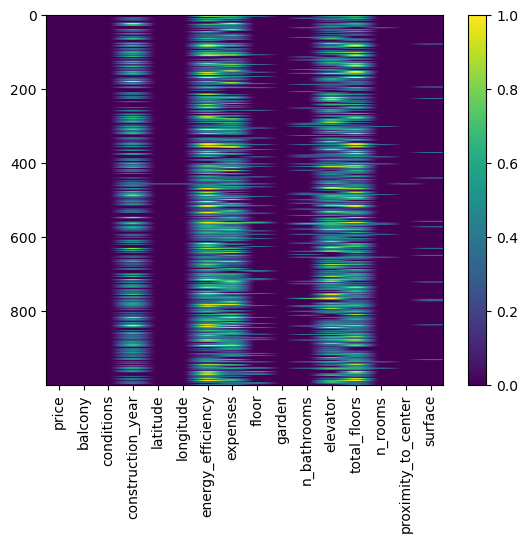

In [14]:
plt.imshow(df_train.sample(1000).isna().to_numpy(), aspect='auto')
ticks = np.arange(df_train.shape[1])
labels = df_train.columns
plt.xticks(ticks=ticks, labels=labels, rotation = 90)
plt.colorbar()
plt.show()

Look at the distribution of each column

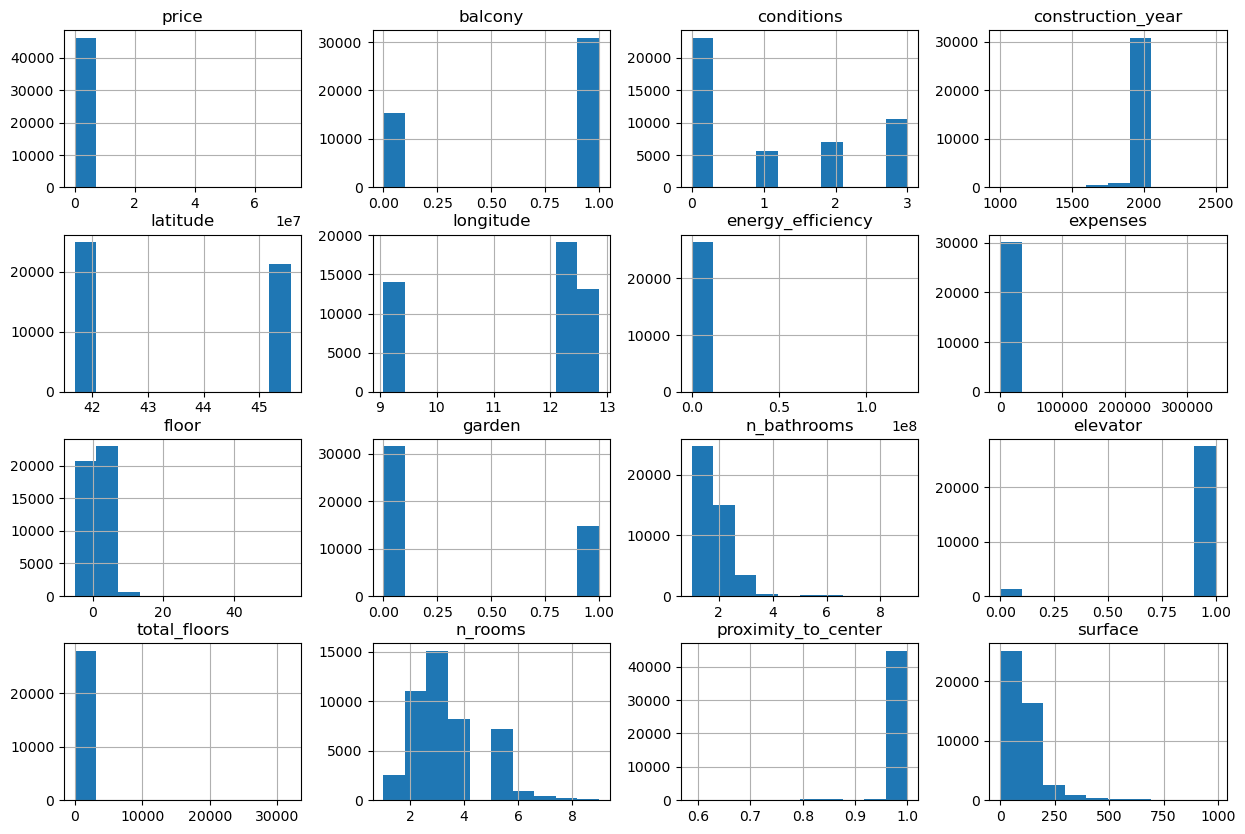

In [15]:
histogram = df_train.hist(figsize=(15, 10))

Start looking at the relationship among the features points by plotting their correlation.  
As expected, features related to the size of the use, such as surface, n_bathrooms and n_rooms, are strongly correlated with the price.

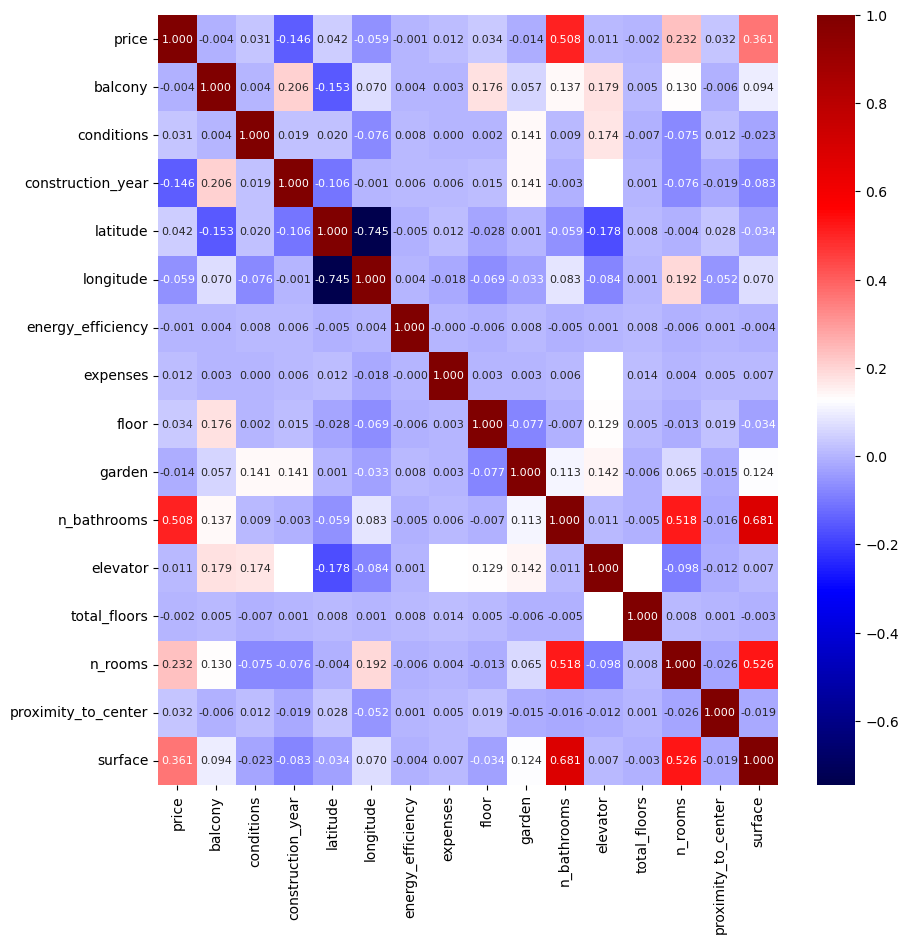

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_train.corr(), annot=True, annot_kws={'size': 8}, fmt='.3f', cmap = 'seismic')
plt.show()

Scatterplot every feature against price to look for possible non linear correlations and locate the outliers.  
In this case, many outliers are in the price itself.

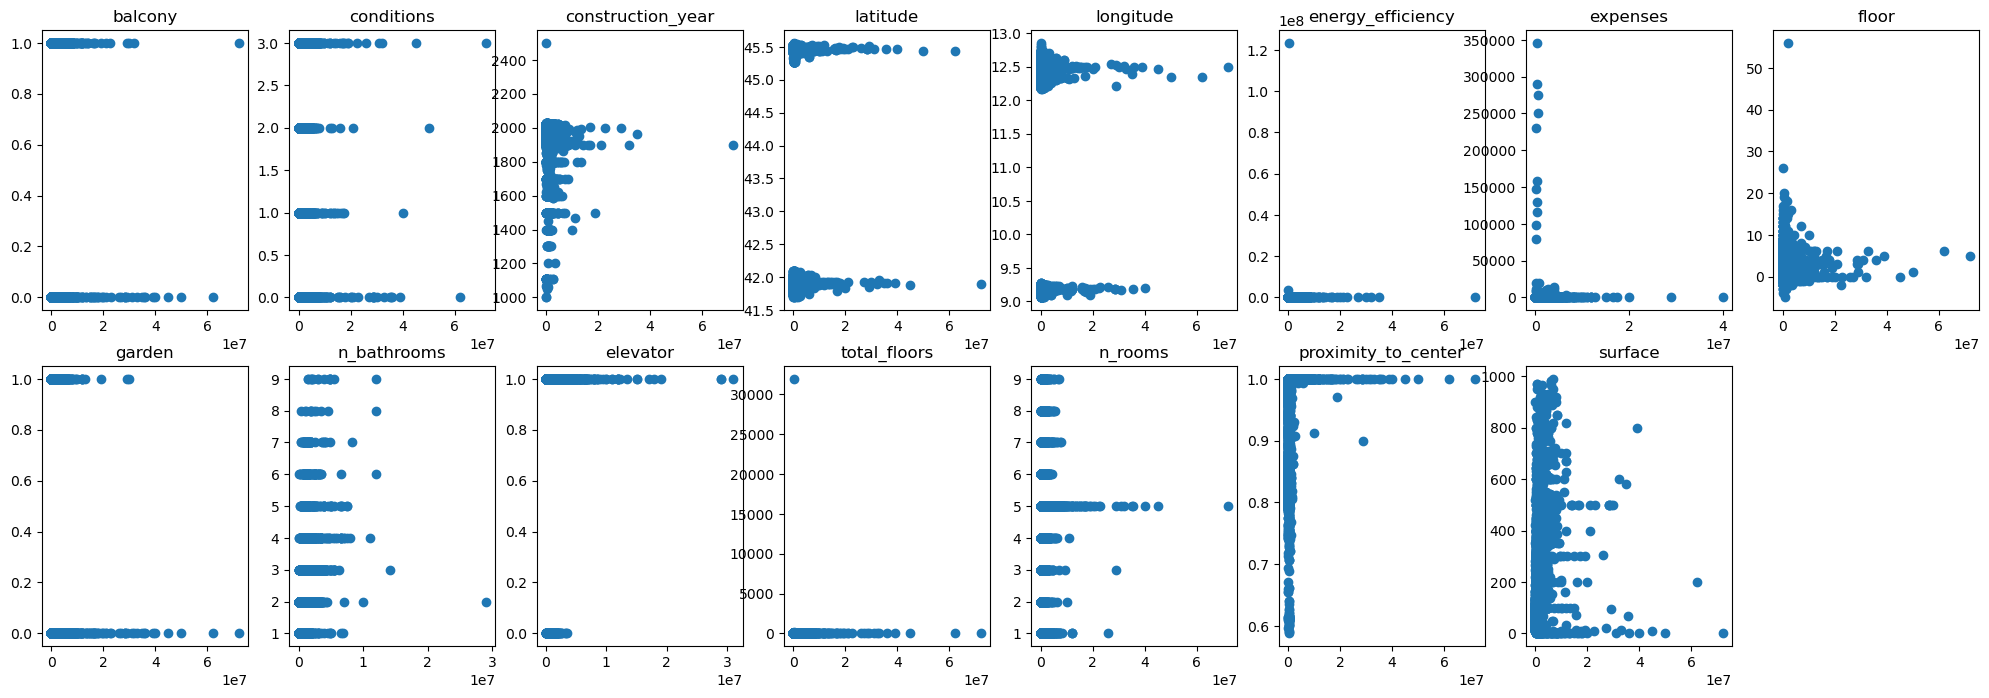

In [17]:
plt.figure(figsize=(25, 8))
for i, col in enumerate(df_train.drop(columns = 'price').columns):
    plt.subplot(2, 8, i+1)
    plt.title(col)
    plt.scatter(df_train.price, df_train[col])

## Feature Analysis

### Price

Plot both the raw price and the log(price) to flatten the distribution and better visualize, given unbalancedness of the data.

c:\Users\giaco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\giaco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\giaco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\giaco\anaconda3\lib\si

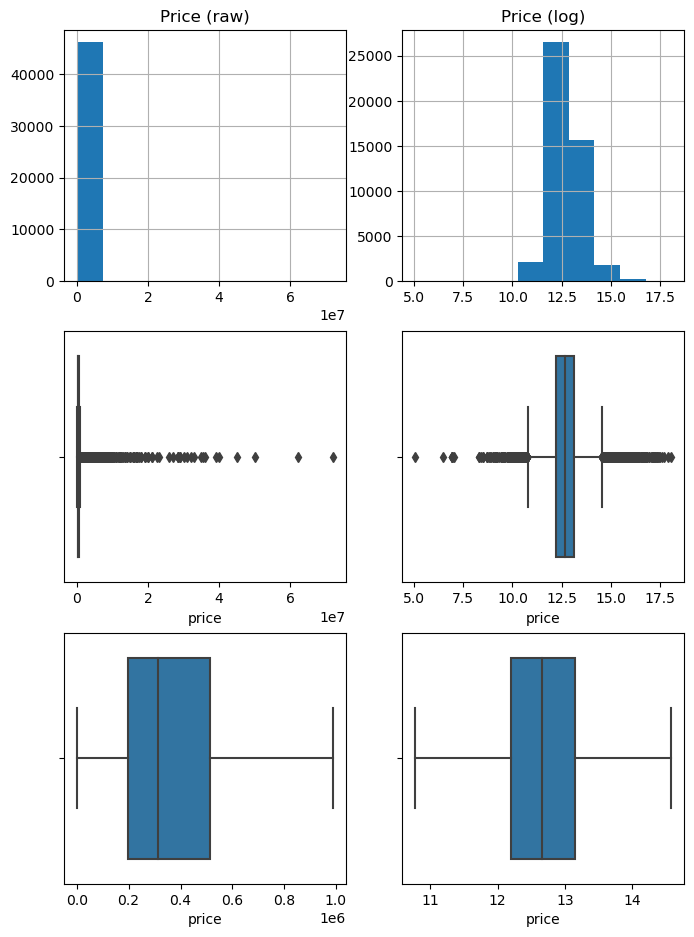

In [18]:
plt.figure(figsize = (8, 15))

plt.subplot(4, 2, 1)
plt.title('Price (raw)')
df_train.price.hist()

plt.subplot(4, 2, 2)
plt.title('Price (log)')
np.log(df_train.price).hist()

plt.subplot(4, 2, 3)
sns.boxplot(df_train.price)

plt.subplot(4, 2, 4)
sns.boxplot(np.log(df_train.price))

plt.subplot(4, 2, 5)
sns.boxplot(df_train.price, showfliers = False)

plt.subplot(4, 2, 6)
sns.boxplot(np.log(df_train.price), showfliers = False)

plt.show()

Most of the observations (99.75%) are below 7,200,000 Euros

In [19]:
counts, edge = np.histogram(df_train.price)

for i in range(len(counts) - 1):
    print(f'{counts[i] / df_train.shape[0]:.4%} < {edge[i + 1]:0.2}')

99.7495% < 7.2e+06
0.1576% < 1.4e+07
0.0453% < 2.2e+07
0.0151% < 2.9e+07
0.0194% < 3.6e+07
0.0043% < 4.3e+07
0.0043% < 5e+07
0.0000% < 5.8e+07
0.0022% < 6.5e+07


Most of the houses are in the interval of price between 200,000 and 510,000 Euros.

In [20]:
df_train.price.describe()

count    4.631200e+04
mean     5.031879e+05
std      1.106504e+06
min      1.540000e+02
25%      1.990000e+05
50%      3.150000e+05
75%      5.150000e+05
max      7.200000e+07
Name: price, dtype: float64

There are a few houses that cost more than 40mln.

In [21]:
df_train.price.nlargest(20) / 1e6

id
51786    72.0
43580    62.0
33733    50.0
31222    45.0
28472    40.0
62231    39.0
33796    36.0
16349    35.5
10525    35.0
36410    33.0
43140    32.0
26972    31.0
29530    30.0
22582    29.0
56342    29.0
31719    28.5
48984    28.5
17836    28.5
27016    27.0
4504     26.0
Name: price, dtype: float64

There are even prices below 1,000 Euros.

In [22]:
df_train.price.nsmallest(10)

id
39430     154
46741     650
60369    1000
62599    1000
9279     1000
65324    1000
19015    1100
39790    3900
15179    4000
51110    4500
Name: price, dtype: int64

The max and min looked strange to me, so i tried to "zoom in" to understand the distribution

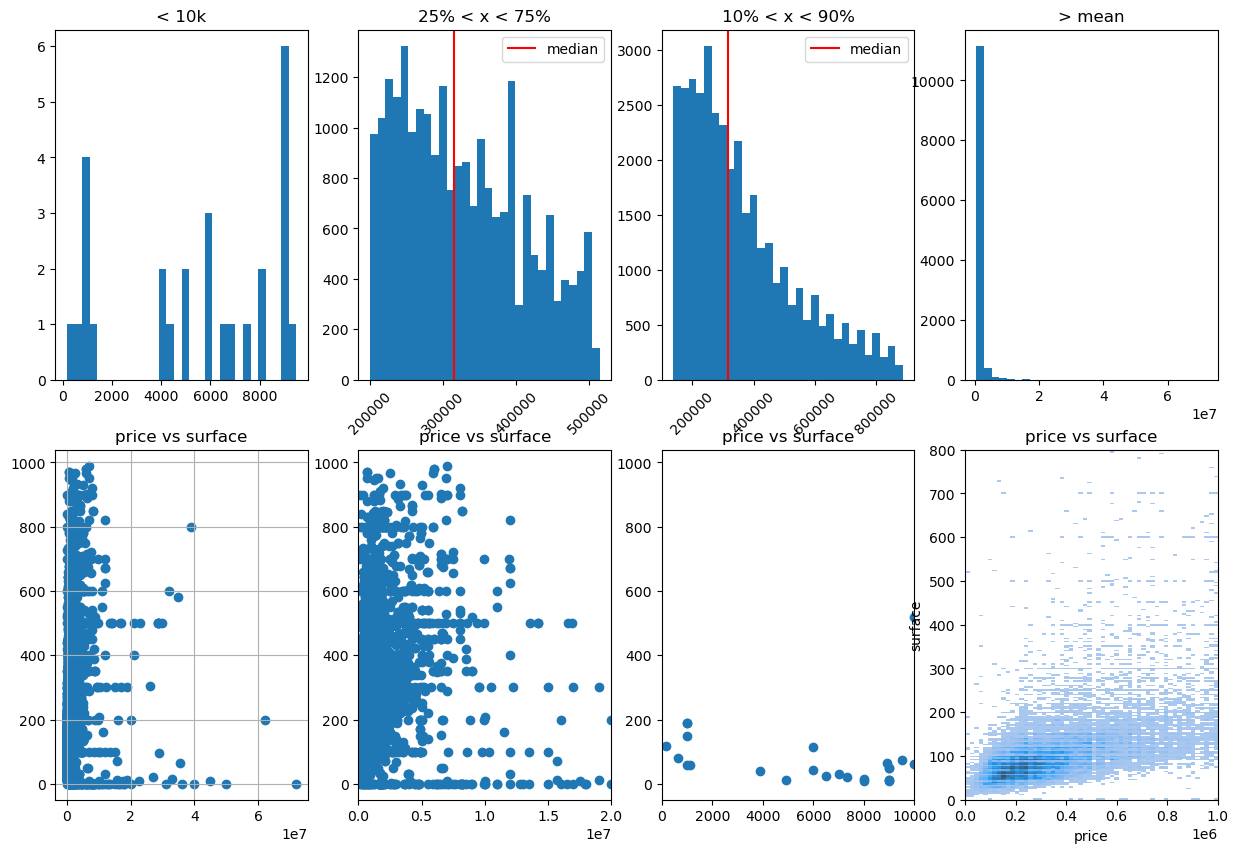

In [23]:
plt.figure(figsize=(15, 10))
plt.subplot(241)
plt.title('< 10k')
plt.hist(df_train.price.loc[df_train.price < 10e3], bins = 30)

plt.subplot(242)
plt.title('25% < x < 75%')
plt.hist(df_train.price.loc[(df_train.price > df_train.price.quantile(0.25)) &
(df_train.price < df_train.price.quantile(0.75))], bins = 30)
plt.axvline(df_train.price.median(), color  ='r', label = 'median')
plt.legend()
plt.xticks(rotation = 45)

plt.subplot(243)
plt.title('10% < x < 90%')
plt.hist(df_train.price.loc[(df_train.price > df_train.price.quantile(0.1)) &
(df_train.price < df_train.price.quantile(0.9))], bins = 30)
plt.axvline(df_train.price.median(), color  ='r', label = 'median')
plt.legend()
plt.xticks(rotation = 45)

plt.subplot(244)
plt.title('> mean')
plt.hist(df_train.price.loc[df_train.price > df_train.price.mean()], bins = 30)

plt.subplot(245)
plt.title('price vs surface')
plt.scatter(df_train.price, df_train.surface)
plt.grid()

plt.subplot(246)
plt.title('price vs surface')
plt.scatter(df_train.price, df_train.surface)
plt.xlim(0, 2e7)

plt.subplot(247)
plt.title('price vs surface')
plt.scatter(df_train.price, df_train.surface)
plt.xlim(0, 10e3)

plt.subplot(248)
plt.title('price vs surface')
sns.histplot(data = df_train.drop(df_train.price.nlargest(1).index), x = 'price', y = 'surface', fill = True)
plt.xlim(0, 1e6)
plt.ylim(0, 800)


plt.show()

### Energy Efficiency

In [24]:
df_train.energy_efficiency.describe()

count    2.640900e+04
mean     5.091382e+03
std      7.600521e+05
min      1.000000e-02
25%      1.590000e+02
50%      1.750000e+02
75%      1.750000e+02
max      1.234570e+08
Name: energy_efficiency, dtype: float64

In [25]:
df_train.energy_efficiency.nlargest(20)

id
15981    123457000.0
65664      3727500.0
49356       269910.0
4947        252367.0
61321       233250.0
2746        222222.0
18742       203660.0
57793       198140.0
25685       169884.0
48400       167050.0
56531       165500.0
26538       162560.0
18161       121843.0
1573        120006.0
6509        113261.0
52147        95010.0
59279        82896.0
64775        71960.0
8882         53432.0
42064        46708.0
Name: energy_efficiency, dtype: float64

c:\Users\giaco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='energy_efficiency'>

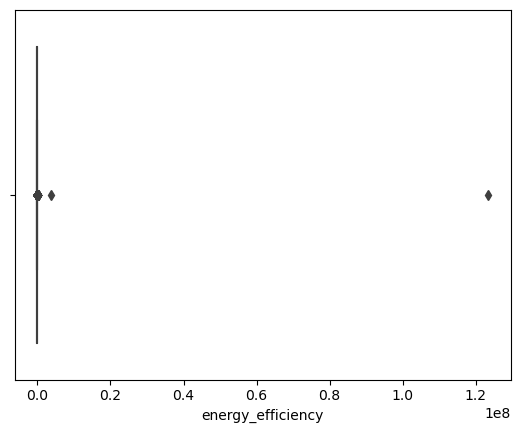

In [26]:
sns.boxplot(df_train.energy_efficiency)

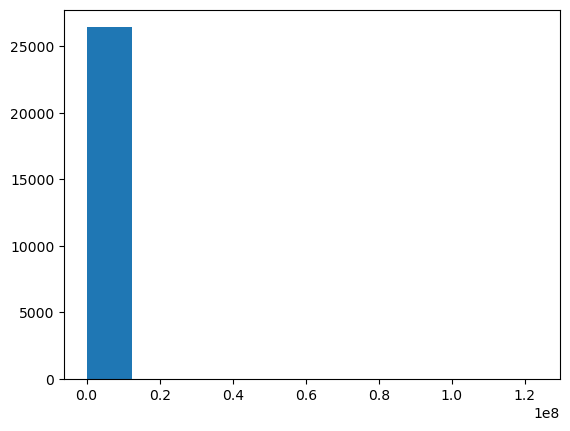

In [27]:
plt.hist(df_train.energy_efficiency)
plt.show()

The distribution of this feature was not very clear due to extreme observations.  
I tried to zoom in by dropping the points furthest away from the main cluster.

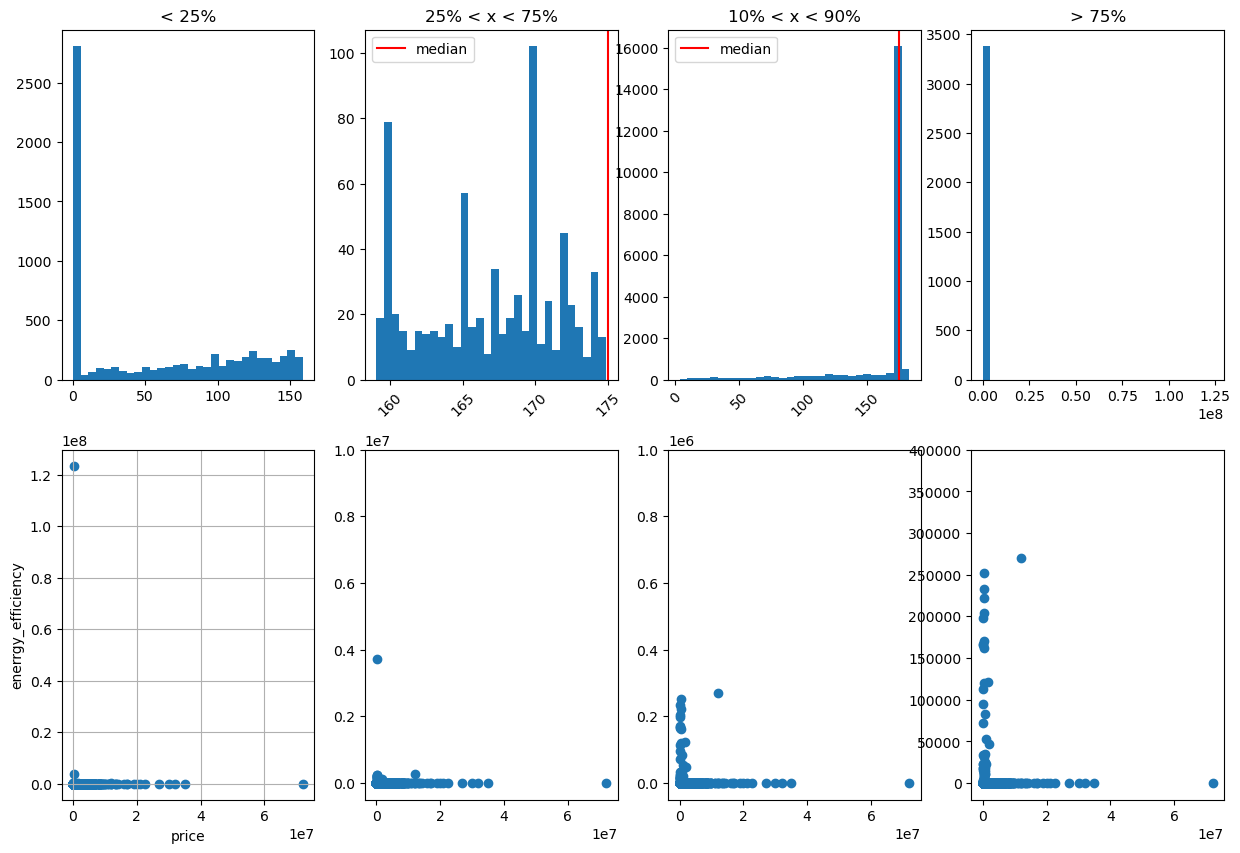

In [28]:
plt.figure(figsize=(15, 10))
plt.subplot(241)
plt.title('< 25%')
plt.hist(df_train.energy_efficiency.loc[df_train.energy_efficiency < df_train.energy_efficiency.quantile(0.25)], bins = 30)

plt.subplot(242)
plt.title('25% < x < 75%')
plt.hist(df_train.energy_efficiency.loc[(df_train.energy_efficiency > df_train.energy_efficiency.quantile(0.25)) &
(df_train.energy_efficiency < df_train.energy_efficiency.quantile(0.75))], bins = 30)
plt.axvline(df_train.energy_efficiency.median(), color  ='r', label = 'median')
plt.legend()
plt.xticks(rotation = 45)

plt.subplot(243)
plt.title('10% < x < 90%')
plt.hist(df_train.energy_efficiency.loc[(df_train.energy_efficiency > df_train.energy_efficiency.quantile(0.1)) &
(df_train.energy_efficiency < df_train.energy_efficiency.quantile(0.9))], bins = 30)
plt.axvline(df_train.energy_efficiency.median(), color  ='r', label = 'median')
plt.legend()
plt.xticks(rotation = 45)

plt.subplot(244)
plt.title('> 75%')
plt.hist(df_train.energy_efficiency.loc[df_train.energy_efficiency > df_train.energy_efficiency.quantile(0.75)], bins = 30)

plt.subplot(245)
plt.scatter(df_train.price, df_train.energy_efficiency)
plt.ylabel('enerrgy_efficiency')
plt.xlabel('price')
plt.grid()

plt.subplot(246)
plt.scatter(df_train.price, df_train.energy_efficiency)
plt.ylim(-0.5e6, 1e7)

plt.subplot(247)
plt.scatter(df_train.price, df_train.energy_efficiency)
plt.ylim(-.5e5, 1e6)

plt.subplot(248)
plt.scatter(df_train.price, df_train.energy_efficiency)
plt.ylim(-2e4, 4e5)

plt.show()

### Total Floors / Floor

The [tallest residential building in Italy](https://it.wikipedia.org/wiki/Grattacieli_di_Milano#:~:text=La%20Torre%20Solaria%2C%20dall'alto,edificio%20in%20acciaio%20in%20Italia.) is the Torre Solaria (37 floors), so I decided to drop everything above this threshold as it must be an error.

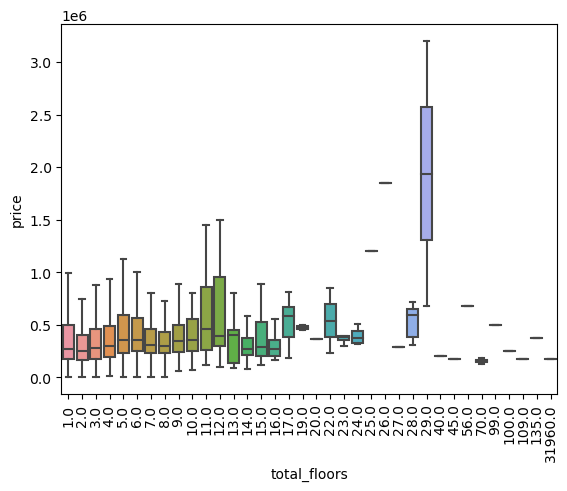

In [29]:
sns.boxplot(data = df_train, x = 'total_floors', y = 'price', showfliers = False, )
plt.xticks(rotation = 90)
plt.show()

Clearly the max values are wrong

In [30]:
df_train.total_floors.describe()

count    27963.000000
mean         5.724207
std        191.115233
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
max      31960.000000
Name: total_floors, dtype: float64

In [31]:
df_train.total_floors.nlargest(15)

id
38776    31960.0
52436      135.0
56531      109.0
9228       100.0
63778       99.0
13933       70.0
1652        70.0
59204       56.0
9965        45.0
2459        40.0
3414        29.0
34217       29.0
15880       28.0
5982        28.0
29104       28.0
Name: total_floors, dtype: float64

I applied the same reasoning as for 'total_floors'

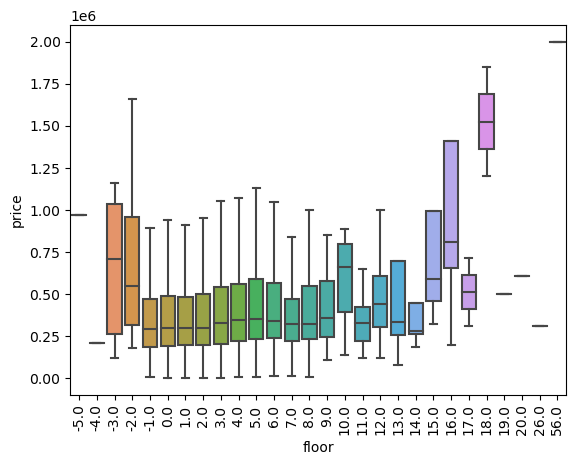

In [32]:
sns.boxplot(data = df_train, x = 'floor', y = 'price', showfliers = False)
plt.xticks(rotation = 90)
plt.show()

In [33]:
df_train.floor.describe()

count    44281.000000
mean         2.033333
std          2.175668
min         -5.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: floor, dtype: float64

In [34]:
df_train.floor.nlargest(10)

id
63598    56.0
29104    26.0
48193    20.0
14730    19.0
37402    18.0
16815    18.0
47903    17.0
24932    17.0
10476    16.0
41705    16.0
Name: floor, dtype: float64

### Expenses

In italy, the average 'spesa condominiale' is [100 euros](https://www.money.it/quanto-si-paga-solitamente-di-condominio). 

In [35]:
df_val.expenses.describe()

count     12817.000000
mean        232.630803
std        5586.584917
min           0.000000
25%          40.000000
50%          80.000000
75%         150.000000
max      500000.000000
Name: expenses, dtype: float64

In [36]:
df_train.expenses.describe()

count     30158.000000
mean        195.285132
std        4035.008418
min           0.000000
25%          40.000000
50%          80.000000
75%         150.000000
max      346000.000000
Name: expenses, dtype: float64

c:\Users\giaco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\giaco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\giaco\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='expenses'>

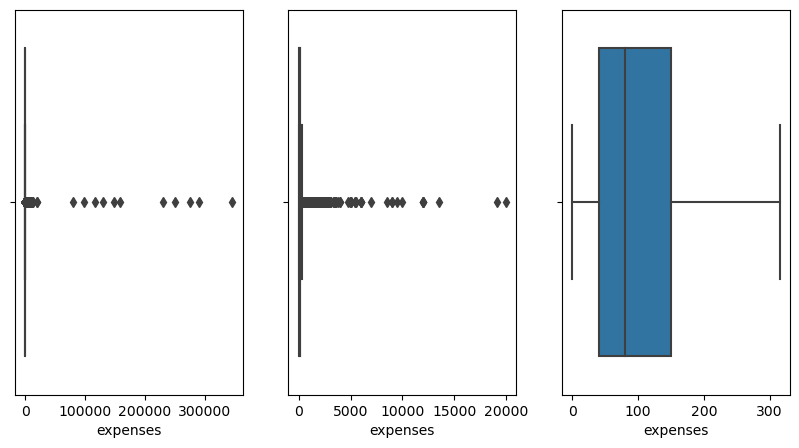

In [37]:
plt.figure(figsize = (10, 5))

plt.subplot(131)
sns.boxplot(df_train.expenses)

plt.subplot(132)
ix = list(df_train.loc[df_train.expenses > 50e3].index)
sns.boxplot(df_train.expenses.drop(ix))

plt.subplot(133)
sns.boxplot(df_train.expenses, showfliers = False)

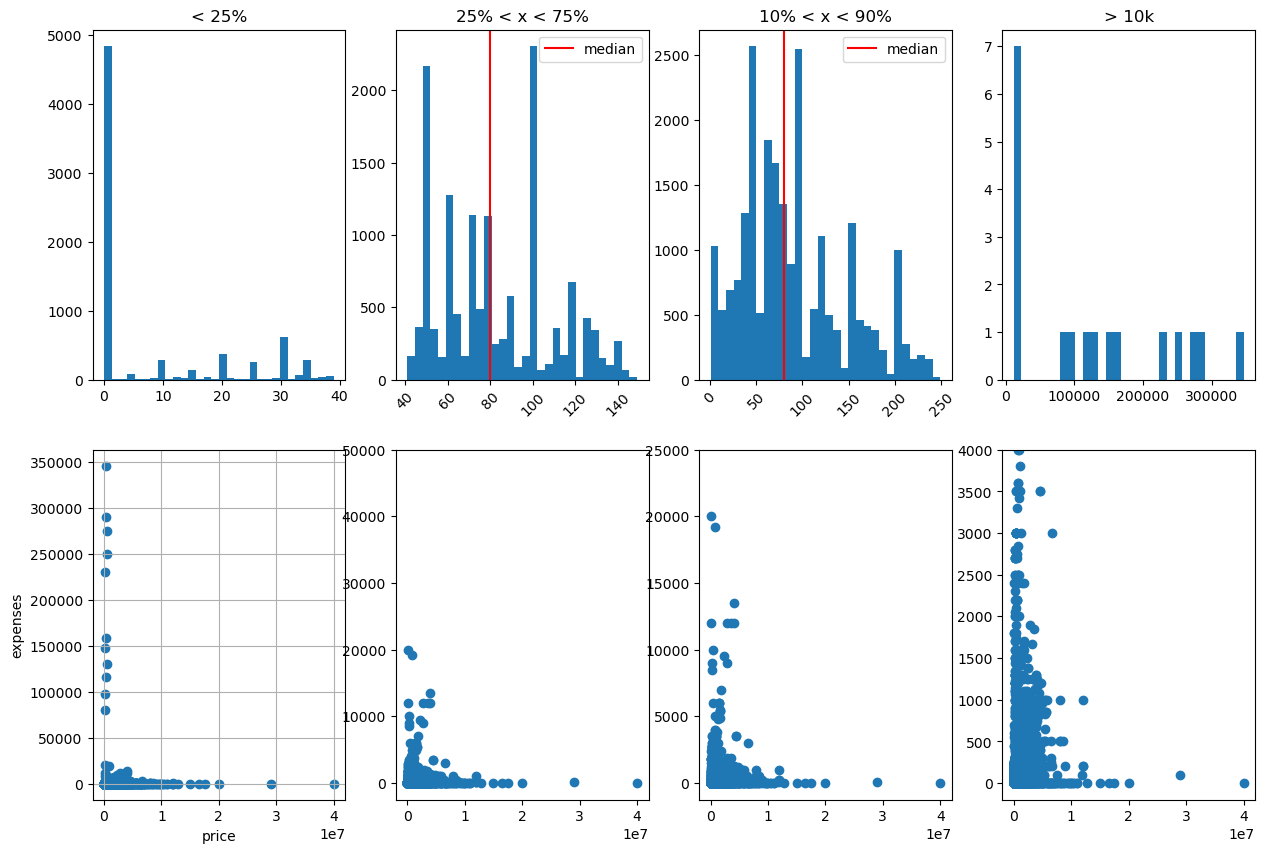

In [38]:
plt.figure(figsize=(15, 10))
plt.subplot(241)
plt.title('< 25%')
plt.hist(df_train.expenses.loc[df_train.expenses < df_train.expenses.quantile(0.25)], bins = 30)

plt.subplot(242)
plt.title('25% < x < 75%')
plt.hist(df_train.expenses.loc[(df_train.expenses > df_train.expenses.quantile(0.25)) &
(df_train.expenses < df_train.expenses.quantile(0.75))], bins = 30)
plt.axvline(df_train.expenses.median(), color  ='r', label = 'median')
plt.legend()
plt.xticks(rotation = 45)

plt.subplot(243)
plt.title('10% < x < 90%')
plt.hist(df_train.expenses.loc[(df_train.expenses > df_train.expenses.quantile(0.1)) &
(df_train.expenses < df_train.expenses.quantile(0.9))], bins = 30)
plt.axvline(df_train.expenses.median(), color  ='r', label = 'median')
plt.legend()
plt.xticks(rotation = 45)

plt.subplot(244)
plt.title('> 10k')
plt.hist(df_train.expenses.loc[df_train.expenses > 10e3], bins = 30)

plt.subplot(245)
plt.scatter(df_train.price, df_train.expenses)
plt.grid()
plt.ylabel('expenses')
plt.xlabel('price')

plt.subplot(246)
plt.scatter(df_train.price, df_train.expenses)
plt.ylim(-25e2, 50e3)

plt.subplot(247)
plt.scatter(df_train.price, df_train.expenses)
plt.ylim(-12.5e2, 25e3)

plt.subplot(248)
plt.scatter(df_train.price, df_train.expenses)
plt.ylim(-2e2, 4e3)

plt.show()

I noticed that 8.8% of the observations report 0.0 expenses, these must be houses and not apartments.  
For curiosity, I checked some coordinates on Google Maps and point to streets with houses rather than flats.

In [39]:
np.sum(df_train.expenses == 0.0) / df_train.shape[0]

0.08531266194506823

In [40]:
df_train.loc[df_train.expenses.nlargest(20).index, ['expenses', 'price']]

,expenses,price
id,,
64757,346000.0,346000
16449,290000.0,290000
46057,275000.0,595000
37136,250000.0,490000
14586,230000.0,225000
19145,158733.0,276000
56887,148000.0,148000
63196,130144.0,439000
59356,116000.0,389000


In [41]:
df_train.loc[df_train.expenses >= df_train.price]

,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
id,,,,,,,,,,,,,,,,
56887,148000,1.0,0.0,1966.0,41.906315,12.594888,NaN,148000.0,2.0,1.0,1.0,NaN,NaN,2.0,1.0,72.0
64757,346000,1.0,1.0,1990.0,41.835591,12.492792,NaN,346000.0,3.0,0.0,2.0,1.0,NaN,4.0,1.0,141.0
14586,225000,0.0,3.0,1967.0,45.472200,9.232300,175.0,230000.0,0.0,1.0,1.0,1.0,6.0,2.0,1.0,53.0
10760,98000,1.0,0.0,1964.0,45.467408,12.223532,NaN,98000.0,2.0,0.0,1.0,NaN,NaN,3.0,1.0,70.0
16449,290000,1.0,2.0,NaN,45.481615,9.236789,NaN,290000.0,3.0,0.0,1.0,1.0,NaN,2.0,1.0,45.0


### Surface

(array([25102., 16306.,  2630.,   928.,   327.,   231.,   161.,    76.,
           75.,    33.]),
 array([  0.,  99., 198., 297., 396., 495., 594., 693., 792., 891., 990.]),
 <BarContainer object of 10 artists>)

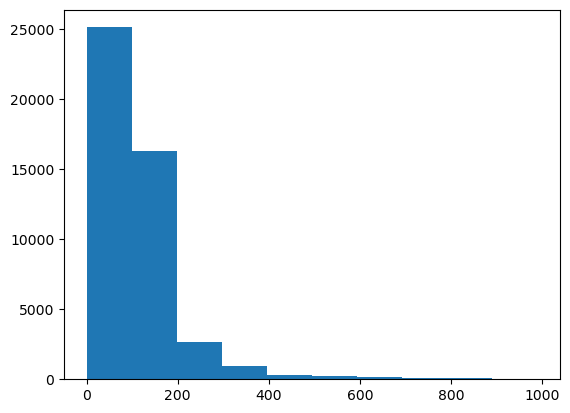

In [42]:
plt.hist(df_train.surface)

In [43]:
df_train.surface.describe()

count    45869.000000
mean       114.866620
std         88.650549
min          0.000000
25%         68.000000
50%         91.000000
75%        130.000000
max        990.000000
Name: surface, dtype: float64

Some houses have 0.0 surface.

In [44]:
print(f'Houses with 0.0 surface: {np.sum(df_train.surface == 0.0)} ({np.sum(df_train.surface == 0.0) / df_train.shape[0]:.2%})')

Houses with 0.0 surface: 97 (0.21%)


Having three features highly correlated (surface, n_bathrooms, n_rooms), I'm going to set the 0.0 surfaces to NaN and use a Linear Regression on n_rooms and n_bathrooms to fill them.

<AxesSubplot:>

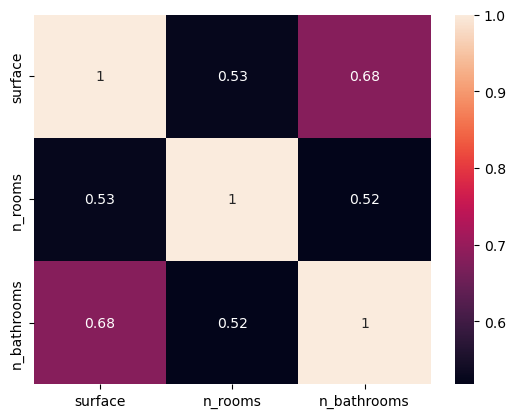

In [45]:
sns.heatmap(df_train[['surface', 'n_rooms', 'n_bathrooms']].corr(), annot = True)

First of all, make sure there aren't too many NaNs.

In [46]:
df_train[['surface', 'n_rooms', 'n_bathrooms']].isna().value_counts()

surface  n_rooms  n_bathrooms
False    False    False          43477
                  True            2046
True     False    False            417
False    True     True             344
True     False    True              19
         True     True               7
False    True     False              2
dtype: int64

Define the model to regress surface on the number of bathrooms and rooms

R2_score: 0.51942 | Train_Loss: 2214.9


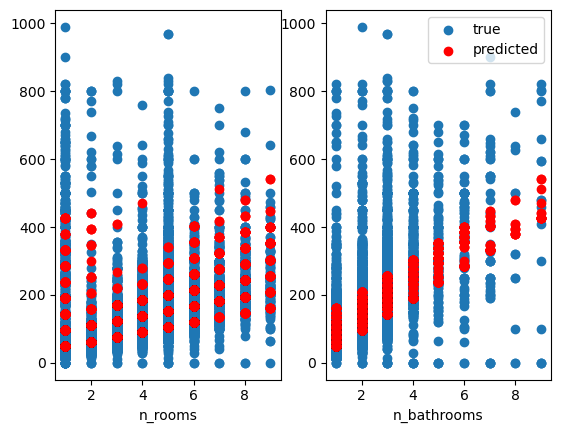

In [47]:
# Linear Regression
data = df_train[['surface', 'n_rooms', 'n_bathrooms']].dropna()
X = data[['n_rooms', 'n_bathrooms']]
y = data[['surface']]
lm = LinearRegression()
lm.fit(X, y)

print(f'R2_score: {r2_score(y, lm.predict(X)):0.5} | Train_Loss: {mean_squared_error(y, lm.predict(X)):0.5}')

plt.subplot(121)
plt.scatter(X.n_rooms, y)
plt.scatter(X.n_rooms, lm.predict(X), color = 'r')
plt.xlabel('n_rooms')

plt.subplot(122)
plt.scatter(X.n_bathrooms, y, label = 'true')
plt.scatter(X.n_bathrooms, lm.predict(X), color = 'r', label = 'predicted')
plt.xlabel('n_bathrooms')

plt.legend()
plt.show()

I tried KNN as alternative model but it performed worse.

R2_score: 0.53066 | Train_Loss: 2163.1


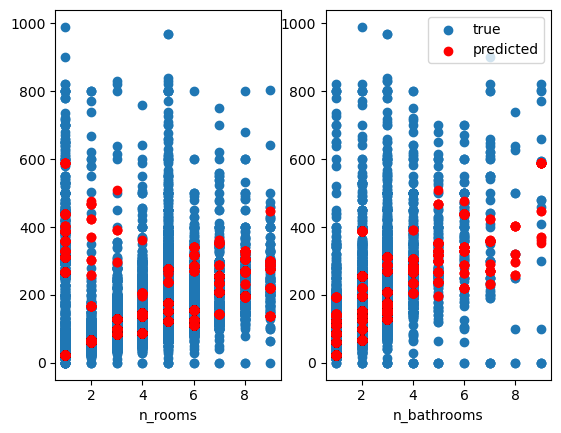

In [48]:
# KNN
data = df_train[['surface', 'n_rooms', 'n_bathrooms']].dropna()
X = data[['n_rooms', 'n_bathrooms']]
y = data[['surface']]

knn = KNeighborsRegressor(n_neighbors=5).fit(X, y)

print(f'R2_score: {r2_score(y, knn.predict(X)):0.5} | Train_Loss: {mean_squared_error(y, knn.predict(X)):0.5}')

plt.subplot(121)
plt.scatter(X.n_rooms, y)
plt.scatter(X.n_rooms, knn.predict(X), color = 'r')
plt.xlabel('n_rooms')

plt.subplot(122)
plt.scatter(X.n_bathrooms, y, label = 'true')
plt.scatter(X.n_bathrooms, knn.predict(X), color = 'r', label = 'predicted')
plt.xlabel('n_bathrooms')

plt.legend()
plt.show()

### Garden

More than half of the houses have a garden. Which I deduce does not refer to a private garden, 
given that even houses above the ground floor have it.

In [49]:
df_train['garden'] = df_train.garden.fillna(0)

In [50]:
df_train.garden.value_counts() / df_train.shape[0]

0.0    0.680795
1.0    0.319205
Name: garden, dtype: float64

In [51]:
df_train.loc[df_train.garden == 1, 'floor']

id
62281    1.0
44039    0.0
14881    0.0
11678    7.0
62735    3.0
        ... 
58392    5.0
5026     1.0
44620    4.0
63289    2.0
63367   -1.0
Name: floor, Length: 14783, dtype: float64

It is interesting to notice how the mean of energy efficiency for the houses with the  
garden is much greater than that of those without it. However this is due to the presence
of the huge outlier in this category, which is probably just random.

In [52]:
df_train.groupby('garden').mean().energy_efficiency

garden
0.0      469.146067
1.0    12709.055678
Name: energy_efficiency, dtype: float64

In [53]:
df_train.loc[df_train.energy_efficiency.nlargest(5).index, 'garden']

id
15981    1.0
65664    0.0
49356    1.0
4947     1.0
61321    1.0
Name: garden, dtype: float64

Remove the two largest and check again

In [54]:
df_train.drop(df_train.energy_efficiency.nlargest(2).index).groupby('garden').mean().energy_efficiency

garden
0.0    242.372057
1.0    329.965130
Name: energy_efficiency, dtype: float64

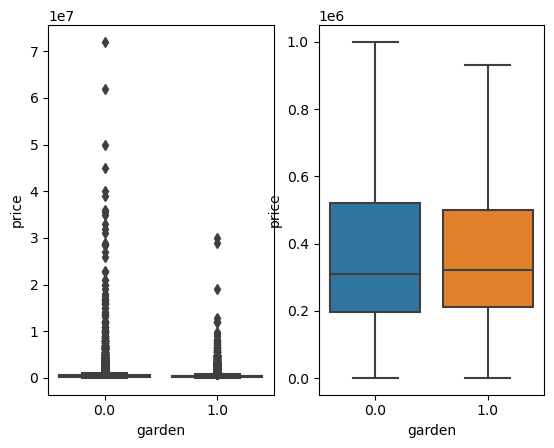

In [55]:
plt.subplot(121)
sns.boxplot(data = df_train, x = 'garden', y = 'price')

plt.subplot(122)
sns.boxplot(data = df_train, x = 'garden', y = 'price', showfliers = False)

plt.show()

### Balcony

Same as before, the conditional mean of energy_efficiency is biased

In [56]:
df_train['balcony'] = df_train.garden.fillna(0)

In [57]:
df_train.groupby('balcony').mean().energy_efficiency

balcony
0.0      469.146067
1.0    12709.055678
Name: energy_efficiency, dtype: float64

In [58]:
df_train.loc[df_train.energy_efficiency.nlargest(10).index, 'balcony']

id
15981    1.0
65664    0.0
49356    1.0
4947     1.0
61321    1.0
2746     0.0
18742    0.0
57793    1.0
25685    0.0
48400    1.0
Name: balcony, dtype: float64

### Conditions

To analyze conditions, encode back so that to understand the semantic meaning of each category

In [59]:
df_train['conditions'] = enc.inverse_transform(df_train[['conditions']])

From the graphs we can underastand that these category drive the price as expected:  
Nuovo > Ottimo > Da Ristrutture > Abitabile

In [60]:
df_train.groupby('conditions').median().price.sort_values(ascending = False)

conditions
Nuovo / Nuova costruzione    340000.0
Ottimo / Ristrutturato       330000.0
Da ristrutturare             315000.0
Buono stato / Abitabile      295000.0
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Density'>

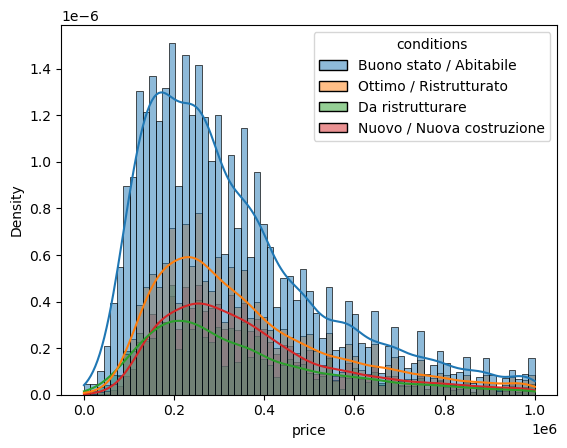

In [61]:
ix = df_train.loc[df_train.price > 1e6].index
sns.histplot(data = df_train.drop(ix), x = 'price', hue = 'conditions', kde = True, stat = 'density')

<AxesSubplot:xlabel='price', ylabel='conditions'>

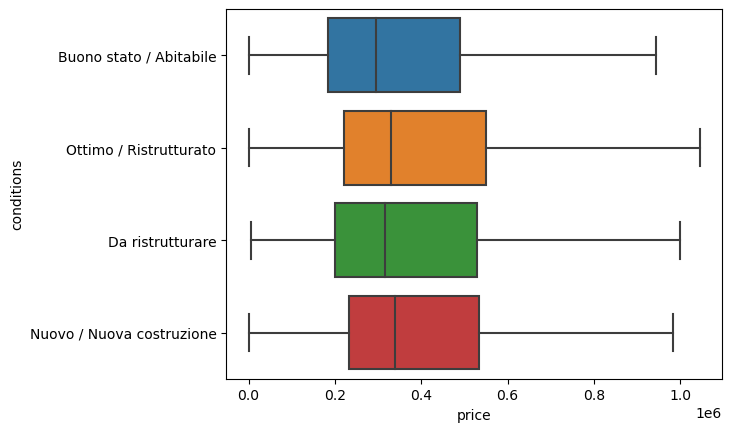

In [62]:
sns.boxplot(data = df_train, y = 'conditions', x = 'price', showfliers = False)

Encode back to carry on the analysis

In [63]:
df_train['conditions'] = enc.transform(df_train[['conditions']].fillna(df_train.conditions.mode()[0]))

### Construction Year

The houses in the databases goes from year 1000, to 2500, which is clearly an outlier.  
However, some houses that have already been sold but are not yet ready are present, up to 2025.

In [64]:
m0 = df_train.construction_year.min()
m1 = df_train.construction_year.max()

print(f'from {m0} to {m1}')

from 1000.0 to 2500.0


In [65]:
df_train.construction_year.sort_values(ascending = False).unique()

array([2500., 2025., 2024., 2023., 2022., 2021., 2020., 2019., 2018.,
       2017., 2016., 2015., 2014., 2013., 2012., 2011., 2010., 2009.,
       2008., 2007., 2006., 2005., 2004., 2003., 2002., 2001., 2000.,
       1999., 1998., 1997., 1996., 1995., 1994., 1993., 1992., 1991.,
       1990., 1989., 1988., 1987., 1986., 1985., 1984., 1983., 1982.,
       1981., 1980., 1979., 1978., 1977., 1976., 1975., 1974., 1973.,
       1972., 1971., 1970., 1969., 1968., 1967., 1966., 1965., 1964.,
       1963., 1962., 1961., 1960., 1959., 1958., 1957., 1956., 1955.,
       1954., 1953., 1952., 1951., 1950., 1949., 1948., 1947., 1946.,
       1945., 1944., 1943., 1942., 1941., 1940., 1939., 1938., 1937.,
       1936., 1935., 1934., 1933., 1932., 1931., 1930., 1929., 1928.,
       1927., 1926., 1925., 1924., 1923., 1922., 1921., 1920., 1919.,
       1918., 1917., 1916., 1915., 1914., 1913., 1912., 1911., 1910.,
       1909., 1908., 1907., 1906., 1905., 1904., 1903., 1902., 1901.,
       1900., 1899.,

Notice how almost half of the houses in the dataset where built in the second half of the  
20th century.

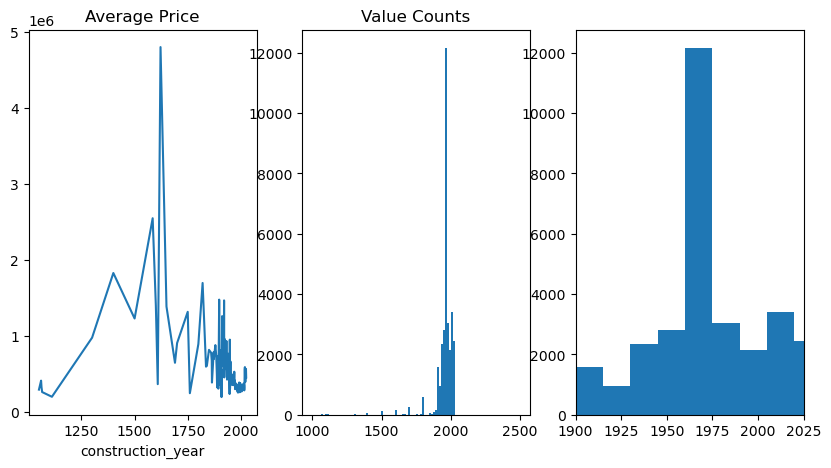

In [66]:
plt.figure(figsize = (10, 5))

plt.subplot(131)
plt.title('Average Price')
df_train.dropna().groupby('construction_year').mean().price.plot()

plt.subplot(132)
plt.title('Value Counts')
plt.hist(df_train.construction_year, bins = 100)

plt.subplot(133)
plt.hist(df_train.construction_year, bins = 100)
plt.xlim(1900, 2025)

plt.show()

### Bathroom / Rooms

These are two feature highly similar, I will carry out a joint analysis.  
They both are positively correlated with the price.

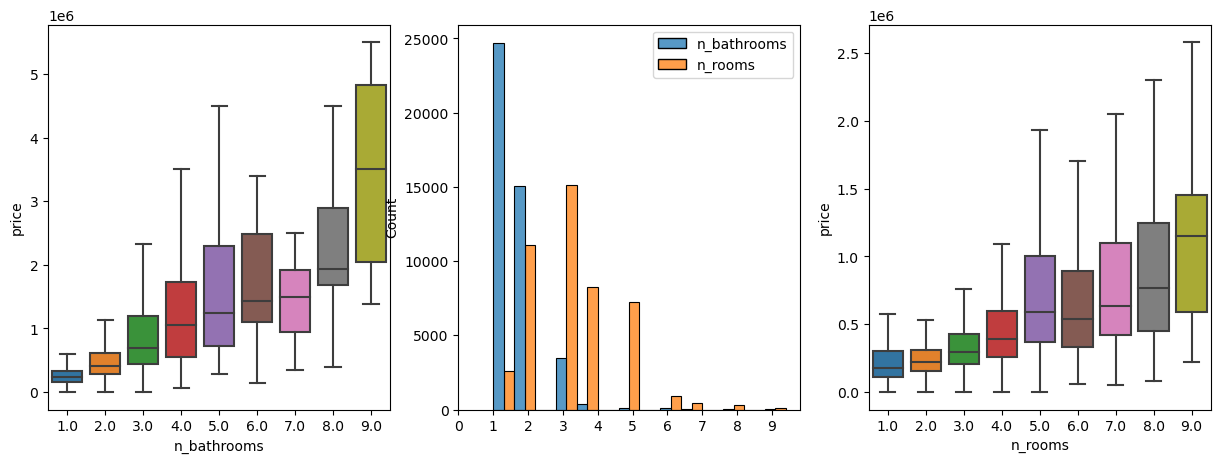

In [67]:
plt.figure(figsize = (15,5))
plt.subplot(131)
sns.boxplot(data = df_train, x = 'n_bathrooms', y = 'price', showfliers = False)

plt.subplot(132)
sns.histplot(df_train[['n_bathrooms', 'n_rooms']], multiple='dodge', binwidth = 0.6)
plt.xticks(ticks = np.arange(10, dtype = int))

plt.subplot(133)
sns.boxplot(data = df_train, x = 'n_rooms', y = 'price', showfliers = False)

plt.show()

### Latitude / Longitude

Given the importance of the location of the house when predicting the price, I decided to drop any entry without the coordinates

In [68]:
df_train[['latitude', 'longitude']].isna().value_counts()

latitude  longitude
False     False        46299
True      True            13
dtype: int64

With a simple scatterplot, notice that the houses are distributed in three cluster, exploit poi.csv to locate the corresponding city

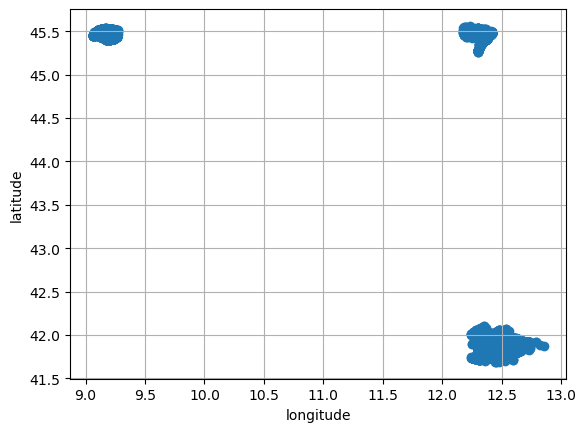

In [69]:
plt.scatter(df_train.longitude, df_train.latitude)
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.grid()
plt.show()

### Proximity to center

Most of the houses are close to the city center, there are no outliers.

<AxesSubplot:>

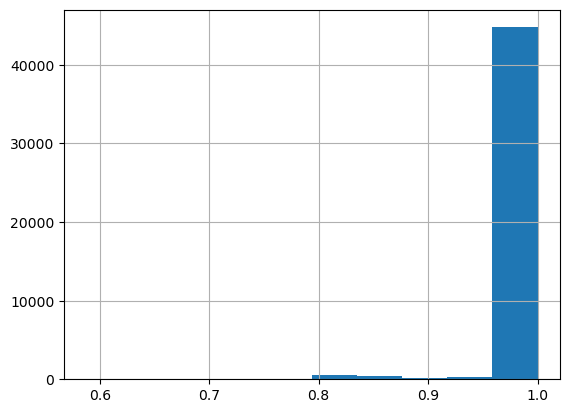

In [70]:
df_train.proximity_to_center.hist()

Visualize the distance of the houses from the city center

Text(0, 0.5, 'Latitude')

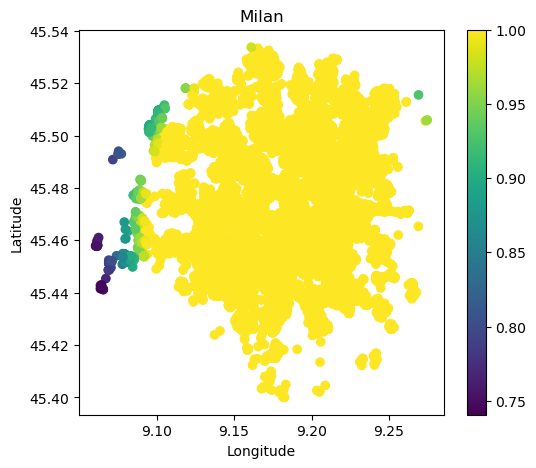

In [71]:
plt.figure(figsize = (20, 5))

nrows = 1
ncols = 3

plt.subplot(nrows, ncols, 1)
plt.title('Milan')
data = df_train.loc[(df_train.longitude < 9.5) & (df_train.longitude > 9) & (df_train.latitude > 45) & (df_train.latitude < 45.55)]
plt.scatter(data.longitude, data.latitude, c = data.proximity_to_center)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

### Elevator

In [72]:
df_train.elevator.value_counts()

1.0    27498
0.0     1371
Name: elevator, dtype: int64

<AxesSubplot:xlabel='elevator', ylabel='price'>

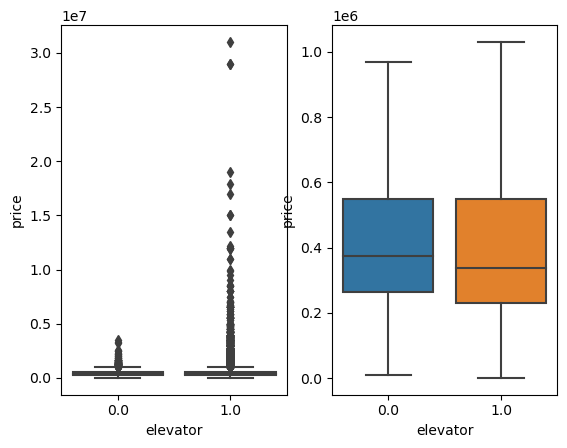

In [73]:
plt.subplot(121)
sns.boxplot(data = df_train, x = 'elevator', y = 'price')

plt.subplot(122)
sns.boxplot(data = df_train, x = 'elevator', y = 'price', showfliers = False)

## Data Processing

### Outliers

After having inspected all the features, deal with the outliers.

In [74]:
def process_outliers(df, istraining = False):

    if istraining:
        
        df = df.drop(df.price.nlargest(2).index) # the two prices above 40,000,000
        df = df.drop(df.price.nsmallest(2).index) # the two prices below 1,000

    df.loc[df.energy_efficiency > 1e7, 'energy_efficiency'] = np.nan
    df.loc[df.floor > 37, 'floor'] = np.nan
    df.loc[df.total_floors > 37, 'total_floors'] = np.nan
    df.loc[df.construction_year > 2100, 'construction_year'] = np.nan
    df_train.loc[df_train.expenses >= df_train.price, 'expenses'] = np.nan

    return df

In [75]:
process_outliers(df_train, istraining=True)

,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
id,,,,,,,,,,,,,,,,
10461,60000,0.0,0.0,1980.0,41.901300,12.700000,175.00,30.0,2.0,0.0,1.0,NaN,3.0,1.0,1.00000,35.0
51304,900000,0.0,0.0,NaN,41.907017,12.481311,NaN,NaN,3.0,0.0,1.0,1.0,NaN,3.0,1.00000,131.0
33032,33000,0.0,0.0,1960.0,41.976500,12.440500,204.20,30.0,4.0,0.0,1.0,NaN,4.0,1.0,1.00000,16.0
62281,166000,1.0,3.0,NaN,45.484800,12.198200,175.00,NaN,1.0,1.0,1.0,NaN,1.0,2.0,0.99205,100.0
45681,410000,0.0,0.0,NaN,45.424480,12.328622,65.91,NaN,3.0,0.0,2.0,1.0,NaN,3.0,1.00000,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33085,329999,0.0,0.0,1929.0,41.923500,12.446100,175.00,35.0,3.0,0.0,1.0,NaN,4.0,3.0,1.00000,88.0
17403,599000,0.0,1.0,1920.0,41.916743,12.454925,NaN,170.0,6.0,0.0,2.0,1.0,NaN,5.0,1.00000,189.0
33332,549000,0.0,0.0,NaN,45.454701,9.242711,NaN,NaN,NaN,0.0,2.0,1.0,NaN,3.0,1.00000,140.0


#### Local Outliers Factor

I tried to implemente the LOF which assign to each point a score according to the overall density of the sample.

In [76]:
# plt.figure(figsize = (20, 15))
# cols = df_train.drop(columns = 'price').dropna().columns
# n = int(np.ceil(np.sqrt(cols.shape[0])))

# for i, col in enumerate(cols[:2]):
#     print(col)
#     X = df_train[['price', col]].dropna().to_numpy()
#     lof = LocalOutlierFactor(n_neighbors = int(0.05 * X.shape[0])).fit(X)
#     plt.subplot(n, n, i+1)
#     plt.title(col)
#     plt.scatter(X[:, 0], X[:, 1], c = lof.negative_outlier_factor_ )

In [77]:
# plt.scatter(X[:, 0], X[:, 1], c = lof.negative_outlier_factor_ < -5, cmap = ListedColormap(['k', 'red'] ))
# plt.axvline(pd.DataFrame(X[:, 0]).quantile(0.975).iloc[0], color = 'red', label = '0.975 Quantile')
# plt.legend()

### NaN

After having inspected all the columns, it's time to fill in the NaN values

In [187]:
def process_nan(df, istraining = False):

    if istraining: 

        # Drop the rows with more than 40% NaNs
        row_nan = df.isna().sum(axis = 1) / df.shape[1]
        df = df.drop(df[row_nan > 0.45].index)
        
        # Coordinates
        df = df.drop(df.loc[df.latitude.isna()].index)

        # Surface
        global lm
        data = df[['surface', 'n_rooms', 'n_bathrooms']].dropna()
        X = data[['n_rooms', 'n_bathrooms']]
        y = data[['surface']]
        lm = LinearRegression()
        lm.fit(X, y)

        # Rest of NaN's
        global imputer, cols
        cols = df.drop(columns = ['price', 'surface']).columns
        imputer = SimpleImputer(strategy='median').fit(df[cols])

    # Rest of NaN's
    df[cols] = imputer.transform(df[cols])

    # Surface
    if any(df.surface.isna()):
        df.loc[df.surface.isna(), 'surface'] = lm.predict(df.loc[df.surface.isna(), ['n_rooms', 'n_bathrooms']]).ravel()
    
    return df


In [79]:
process_nan(df_train, istraining=True)

,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface
id,,,,,,,,,,,,,,,,
10461,60000,0.0,0.0,1980.0,41.901300,12.700000,175.00,30.0,2.0,0.0,1.0,1.0,3.0,1.0,1.00000,35.0
51304,900000,0.0,0.0,1967.0,41.907017,12.481311,175.00,80.0,3.0,0.0,1.0,1.0,4.0,3.0,1.00000,131.0
33032,33000,0.0,0.0,1960.0,41.976500,12.440500,204.20,30.0,4.0,0.0,1.0,1.0,4.0,1.0,1.00000,16.0
62281,166000,1.0,3.0,1967.0,45.484800,12.198200,175.00,80.0,1.0,1.0,1.0,1.0,1.0,2.0,0.99205,100.0
45681,410000,0.0,0.0,1967.0,45.424480,12.328622,65.91,80.0,3.0,0.0,2.0,1.0,4.0,3.0,1.00000,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33085,329999,0.0,0.0,1929.0,41.923500,12.446100,175.00,35.0,3.0,0.0,1.0,1.0,4.0,3.0,1.00000,88.0
17403,599000,0.0,1.0,1920.0,41.916743,12.454925,175.00,170.0,6.0,0.0,2.0,1.0,4.0,5.0,1.00000,189.0
33332,549000,0.0,0.0,1967.0,45.454701,9.242711,175.00,80.0,2.0,0.0,2.0,1.0,4.0,3.0,1.00000,140.0


### Feature Augmentation

Not only the city is important to determine the price of the house, but even more where inside  
such city the house is located.  
In order to improve, I want to add:
- city --> a label per each city
- from_city_center --> distance from the center of the city ("Duomo" for Milan, "Colosseo" for Rome and "Piazza San Marco" for Venice)

Define a function to compute the distance between two decimal coordinates (geopy.distance doesn't work with vectors)

In [80]:
# To compute the distance in vector form
def geo_distance(lat1, lon1, lat2, lon2):

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    R = 6373.0
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return  R * c

#### poi.csv

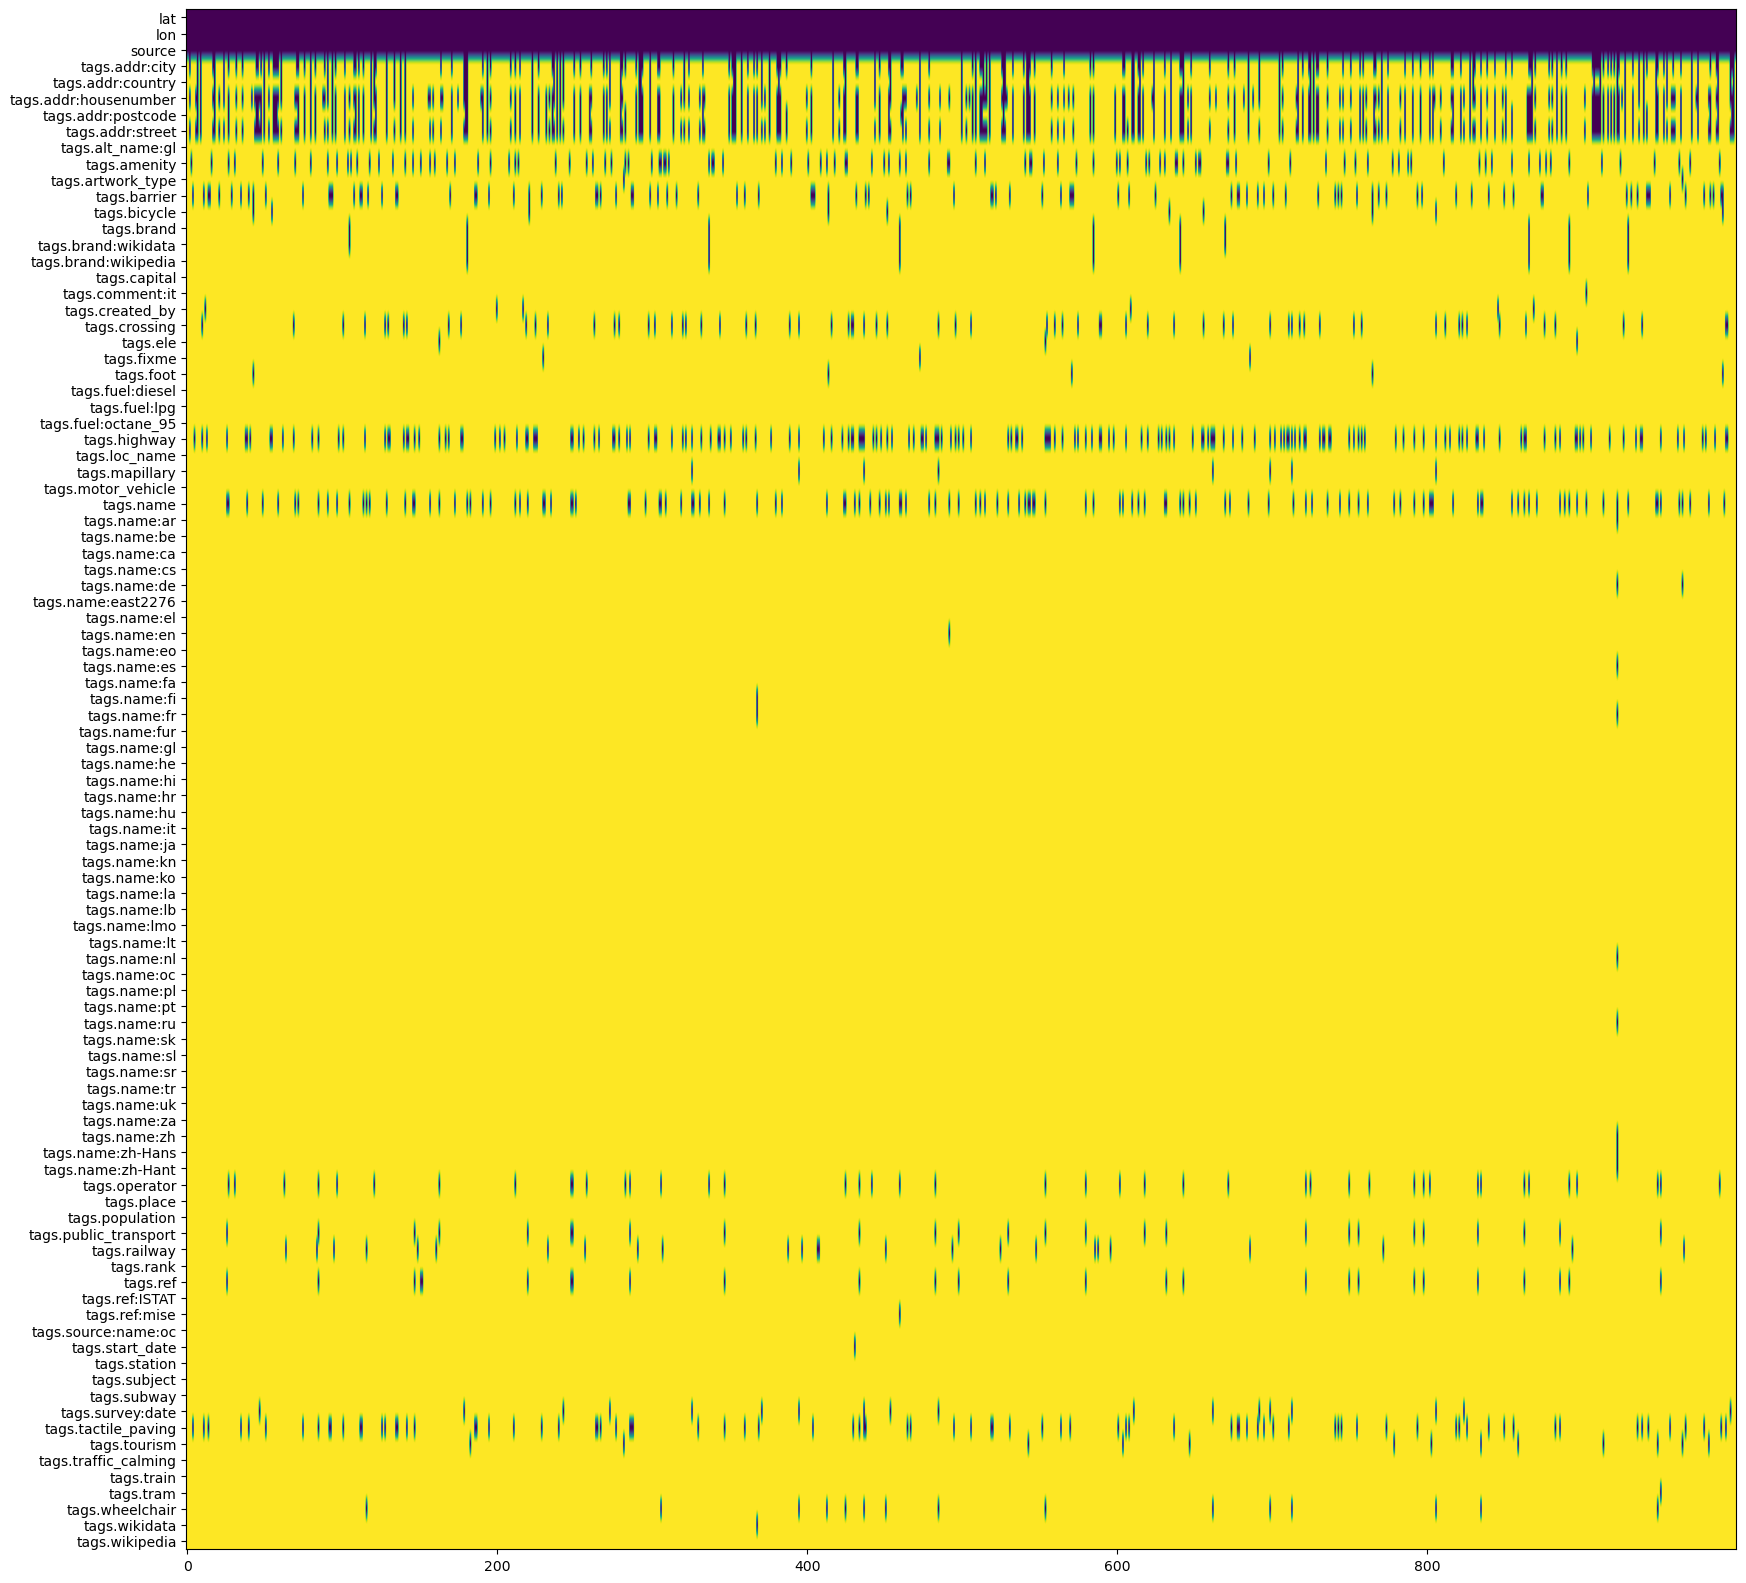

In [81]:
# Visualize poi.csv
plt.figure(figsize = (20, 20))
plt.imshow(poi.isna().sample(1000).transpose(), aspect = 'auto')
ticks = np.arange(poi.shape[1])
labels = list(poi.columns[ticks])
plt.yticks(ticks = ticks, labels = labels,)
plt.show()

In [82]:
for i in poi['tags.amenity'].unique():
    print(i)

nan
fuel
theatre
cinema
fast_food
fountain
post_office
telephone
courthouse
university
bicycle_rental
drinking_water
parking_entrance
ice_cream
bank
taxi
post_box
bar
pharmacy
clock
atm
restaurant
cafe
bench
library
pub
school
toilets
parking
doctors
nightclub
car_sharing
place_of_worship
townhall
recycling
police
fire_station
waste_basket
arts_centre
bicycle_parking
reception_desk
charging_station
vending_machine
car_wash
ticket_validator
waste_transfer_station
bbq
animal_shelter
childcare
car_rental
parking_space
prep_school
sanitary_dump_station
public_bath
waste_disposal
ferry_terminal
bus_station
post_office;post_box
bureau_de_change
public_building
watering_place
wifi
public_bookcase
grave_yard
studio
kindergarten
community_centre
boat_rental
shower
veterinary
dentist
hunting_stand
motorcycle_parking
gambling
clinic
thermometer; barometer; hygrometer
lavoir
shelter
archive
social_facility
water_point
bicycle_repair_station
college
hospital
vehicle_inspection
disused:pub
social_cl

#### add_closest

Define a function that given a dataframe of targets, with lat-lon, adds either:  
- Columns with distances from the house to the closest point;
- boolean columns which tells whether or not the closest target is closer than a distance;

In [83]:
def add_closest(df, targets, header, radius = False):
    
    lat1 = df.latitude.to_numpy()
    lon1 = df.longitude.to_numpy()
    
    distances = np.zeros((lat1.shape[0], targets.shape[0]))

    for i in range(targets.shape[0]):

        lat2 = targets.lat.iloc[i]
        lon2 = targets.lon.iloc[i]

        distances[:, i] = geo_distance(lat1, lon1, lat2, lon2)

    df[header] = np.min(distances, axis = 1)
    if radius: df[header] = (np.min(distances, axis = 1) < radius).astype(float)
        

    return df

#### city / from_city_center

I retrieved the the location of the what i considered to be the city center from [Google Maps](https://www.google.it/maps/preview)

In [84]:
def add_city(df):

    city_centers = {
        'Milan' : np.array((45.464098, 9.191926)),      # Piazza del Duomo
        'Venice': np.array((45.434132, 12.338334)),     # Piazza San Marco
        'Rome'  : np.array((41.890210, 12.492231))      # Colosseo
        }
    
    lat1 = df.latitude.to_numpy()
    lon1 = df.longitude.to_numpy()

    distances = np.zeros((lat1.shape[0], len(city_centers)))

    for i, key in enumerate(city_centers.keys()):

        lat2 = city_centers[key][0]
        lon2 = city_centers[key][1]
        
        distances[:, i] = geo_distance(lat1, 
                                       lon1,
                                       city_centers[key][0],
                                       city_centers[key][1])

    df['city'] = distances.argmin(axis = 1)             # Cities as 0,1,2
    df['from_city_center'] = distances.min(axis = 1)    # Distance in km from city center

    return df

In [85]:
add_city(df_train)

,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,n_bathrooms,elevator,total_floors,n_rooms,proximity_to_center,surface,city,from_city_center
id,,,,,,,,,,,,,,,,,,
10461,60000,0.0,0.0,1980.0,41.901300,12.700000,175.00,30.0,2.0,0.0,1.0,NaN,3.0,1.0,1.00000,35.0,2,17.246432
51304,900000,0.0,0.0,NaN,41.907017,12.481311,NaN,NaN,3.0,0.0,1.0,1.0,NaN,3.0,1.00000,131.0,2,2.076590
33032,33000,0.0,0.0,1960.0,41.976500,12.440500,204.20,30.0,4.0,0.0,1.0,NaN,4.0,1.0,1.00000,16.0,2,10.509289
62281,166000,1.0,3.0,NaN,45.484800,12.198200,175.00,NaN,1.0,1.0,1.0,NaN,1.0,2.0,0.99205,100.0,1,12.300098
45681,410000,0.0,0.0,NaN,45.424480,12.328622,65.91,NaN,3.0,0.0,2.0,1.0,NaN,3.0,1.00000,90.0,1,1.314300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33085,329999,0.0,0.0,1929.0,41.923500,12.446100,175.00,35.0,3.0,0.0,1.0,NaN,4.0,3.0,1.00000,88.0,2,5.319206
17403,599000,0.0,1.0,1920.0,41.916743,12.454925,NaN,170.0,6.0,0.0,2.0,1.0,NaN,5.0,1.00000,189.0,2,4.271773
33332,549000,0.0,0.0,NaN,45.454701,9.242711,NaN,NaN,NaN,0.0,2.0,1.0,NaN,3.0,1.00000,140.0,0,4.097708


Visualize the distance_from_center.

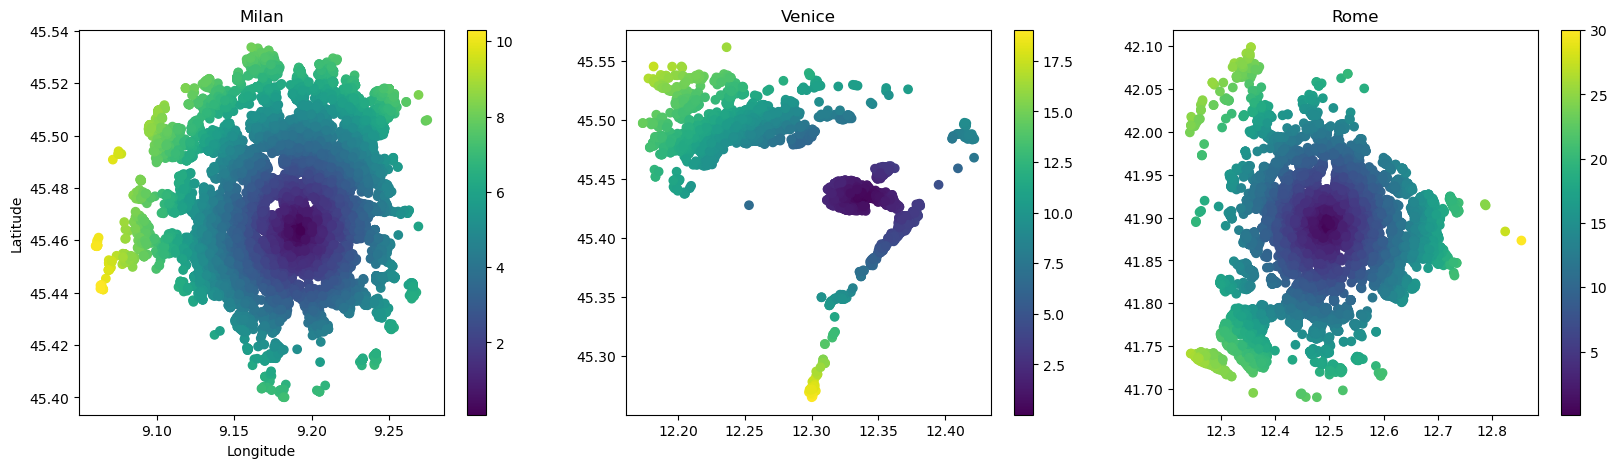

In [86]:
plt.figure(figsize = (20, 5))

nrows = 1
ncols = 3

plt.subplot(nrows, ncols, 1)
plt.title('Milan')
plt.scatter(df_train[df_train.city == 0.0].longitude, df_train[df_train.city == 0.0].latitude, c = df_train[df_train.city == 0.0].from_city_center)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.subplot(nrows, ncols, 2)
plt.title('Venice')
plt.scatter(df_train[df_train.city == 1].longitude, df_train[df_train.city == 1].latitude, c = df_train[df_train.city == 1].from_city_center)
plt.colorbar()

plt.subplot(nrows, ncols, 3)
plt.title('Rome')
plt.scatter(df_train[df_train.city == 2].longitude, df_train[df_train.city == 2].latitude, c = df_train[df_train.city == 2].from_city_center)
plt.colorbar()

#### Public Transport

In [87]:
public_transport = poi.loc[
    (~poi['tags.public_transport'].isna()), 
    ['lat', 'lon', 'tags.public_transport']
]
public_transport.head()

,lat,lon,tags.public_transport
id_on_platform,,,
139272794,45.469473,9.185248,stop_position
232864604,45.468701,9.181697,station
232864605,45.465532,9.186219,station
249177178,45.469306,9.181902,stop_position
257898306,45.456475,9.195268,station


#### Schools

Apparently, there are no schools in Venice, so instead of adding the distance I will add a boolean column which says whether or not the closest school is < 1km

In [88]:
schools = poi.loc[
    (~poi['tags.amenity'].isna()) & (poi['tags.amenity'] == 'school'), 
    ['lat', 'lon']
]
schools.head()

,lat,lon
id_on_platform,,
1396732665,45.196828,11.208458
865266749,46.194195,9.030129
865266750,46.194326,9.031409
1264215366,46.196456,9.013789
6673729286,46.195045,9.013518


#### University

In [89]:
universities = poi.loc[
    (~poi['tags.amenity'].isna()) & (poi['tags.amenity'] == 'university'), 
    ['lat', 'lon']
]
universities.head()

,lat,lon
id_on_platform,,
304665165,45.461191,9.186723
249554065,45.476627,9.227500
2489523034,45.463955,9.169101
2529966718,45.471942,9.187820
3213359363,45.510953,9.211261


#### Zipcode

In [90]:
# zipcodes = poi.loc[
#     (~poi['tags.addr:postcode'].isna()), 
#     ['lat', 'lon', 'tags.addr:postcode', 'tags.addr:city']
# ].rename(columns = {'tags.addr:postcode':'code', 'tags.addr:city':'city'})

# # Clean the ; and convert to float
# zipcodes['code'] = zipcodes.code.astype(str).str.split(';', expand=True)[0].astype(float)

# zipcodes

In [91]:
# plt.figure(figsize = (20, 5))
# plt.hist(zipcodes.code, bins = 300)
# plt.xlim(0, 5000)
# plt.xticks(np.arange(0, 40000, 500), rotation = 90)
# plt.show

In [92]:
# def add_zipcode(df, zipcodes):
#     lat1 = df.latitude.to_numpy()
#     lon1 = df.longitude.to_numpy()

#     distances = np.zeros((lat1.shape[0], zipcodes.shape[0]))

#     for i in range(zipcodes.shape[0]):

#         lat2 = zipcodes.lat.iloc[i]
#         lon2 = zipcodes.lon.iloc[i]
        
#         distances[:, i] = geo_distance(lat1, lon1, lat2, lon2)

#     df['zipcodes'] = zipcodes.code.iloc[np.argmin(distances, axis = 1)].to_numpy()

#     return df

#### Kindergarten

In [93]:
kindergartens = poi.loc[
    (~poi['tags.amenity'].isna()) & (poi['tags.amenity'] == 'kindergarten'), 
    ['lat', 'lon']
]
kindergartens.head()

,lat,lon
id_on_platform,,
2105363820,45.999941,8.898449
2574727736,46.038160,8.954041
259590595,45.473774,9.137179
265654306,45.498671,9.224765
651040902,45.550275,9.156134


### Process the Dataset

In [94]:
df_train = pd.read_csv('train.csv', index_col=0)

# Processing
df_train = encode(df_train, istraining=True)
df_train = process_outliers(df_train,  istraining=True)
df_train = process_nan(df_train, istraining=True)

# Feature Augmentation
df_train = add_city(df_train)
df_train = add_closest(df_train, public_transport, 'closest_public_transport')
df_train = add_closest(df_train, schools, 'closest_school', radius=1.0)
df_train = add_closest(df_train, universities, 'closest_university')
df_train = add_closest(df_train, kindergartens, 'closest_kindergarten')

df_train.head()

,price,balcony,conditions,construction_year,latitude,longitude,energy_efficiency,expenses,floor,garden,...,total_floors,n_rooms,proximity_to_center,surface,city,from_city_center,closest_public_transport,closest_school,closest_university,closest_kindergarten
id,,,,,,,,,,,,,,,,,,,,,
10461,60000,1.0,0.0,1980.0,41.901300,12.700000,175.00,30.0,2.0,0.0,...,3.0,1.0,1.00000,35.0,2,17.246432,6.289721,0.0,9.286009,6.786368
51304,900000,0.0,0.0,1967.0,41.907017,12.481311,175.00,80.0,3.0,0.0,...,4.0,3.0,1.00000,131.0,2,2.076590,0.036811,1.0,0.569123,2.244187
33032,33000,0.0,0.0,1960.0,41.976500,12.440500,204.20,30.0,4.0,0.0,...,4.0,1.0,1.00000,16.0,2,10.509289,1.557801,0.0,4.915558,3.194111
62281,166000,0.0,3.0,1967.0,45.484800,12.198200,175.00,80.0,1.0,1.0,...,1.0,2.0,0.99205,100.0,1,12.300098,1.260637,0.0,4.470773,5.362465
45681,410000,1.0,0.0,1967.0,45.424480,12.328622,65.91,80.0,3.0,0.0,...,4.0,3.0,1.00000,90.0,1,1.314300,0.292438,1.0,1.126913,1.854505


## Model-1: OLS (~8e11)

The first model to try is the classical OLS regression with the three feature that are mostly  
correlated with the target variable. 
However, the model is not complex enough to predict well.

In [95]:
# # Linear Regression
# X = df_train[['surface', 'n_bathrooms', 'n_rooms']].to_numpy()
# y = df_train[['price']].to_numpy()

# model_lm = LinearRegression().fit(X, y)

# plt.scatter(X[:, 0], y)
# plt.plot(X[:, 0], model_lm.predict(X), color = 'r')

# loss = mean_squared_error(y, model_lm.predict(X))
# print(f'Train_Loss: {loss:0.5}')

## Model-2: MLP (~6e11)

Create the model

In [96]:
# import torch
# from torch.utils.data import DataLoader

# # Prepare the X, y
# X_train, y_train = df_train.drop(columns='price').to_numpy(), df_train.price.to_numpy()
# scaler = StandardScaler().fit(X_train)
# X_train = scaler.transform(X_train)
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

# X_train = torch.tensor(X_train, dtype = torch.float)
# y_train = torch.tensor(y_train, dtype = torch.float).view(-1, 1)
# X_test = torch.tensor(X_test, dtype = torch.float)
# y_test = torch.tensor(y_test, dtype = torch.float).view(-1, 1)

# # Create the Model
# nn = torch.nn.Sequential(
#     torch.nn.Linear(X_train.shape[1], 5),
#     torch.nn.ReLU(),
#     torch.nn.Linear(5, 1),
#     torch.nn.ReLU()
# )

# # Loss function
# mse = torch.nn.MSELoss()

# # Optimizer
# optimizer = torch.optim.Adam(nn.parameters(), lr = 1)


Training Loop

In [97]:
# num_epochs = int(100e3)
# lr = 1
# mini_batch_size = 32

# # Optimizer
# optimizer = torch.optim.Adam(nn.parameters(), lr = lr)

# # Log stats
# losses = np.zeros((num_epochs, 2))

# for epoch in range(num_epochs):

#     if epoch > 15e3: lr = 0.01
#     if epoch > 45e3: lr = 0.001
    
#     ix = np.random.choice(np.arange(X_train.shape[0]), mini_batch_size)

#     # Forward 
#     y_pred = nn(X_train[ix])
#     loss = mse(y_pred, y_train[ix])

#     # Backward 
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

#     # Log stats
#     with torch.no_grad():
#         test_loss = mse(y_test, nn(X_test))
#         losses[epoch, 0] = loss.item()
#         losses[epoch, 1] = test_loss.item()

#     if epoch % 1000 == 0.0 : print(f"Epoch {epoch+1:05} | test_loss: {test_loss.item():0.5}")
# print(f"Epoch {epoch+1:05} | test_loss: {test_loss.item():0.5}")



In [98]:
# plt.plot(np.arange(losses.shape[0]), losses[:, 1], label = 'Test Loss')
# plt.legend()

## Model-3: Random Forest Regressor (~4e11)

Train the Model

In [99]:
models = []
for epoch in range(5):

    # Prepare the X, y
    X_train, y_train = df_train.drop(columns='price').to_numpy(), df_train.price.to_numpy()
    scaler = StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2)

    # Create & Train the model
    forest = RandomForestRegressor(n_estimators=250, min_samples_leaf = 5)
    forest.fit(X_train, y_train)

    # Make predictions
    y_pred = forest.predict(X_test)

    # Evaluate
    r2 = r2_score(y_test, y_pred)
    loss = mean_squared_error(y_test, y_pred)
    train_loss = mean_squared_error(y_train, forest.predict(X_train))
    print(f'Init-{epoch + 1:02} | Test_Loss: {loss:0.5} | R2: {r2:.4f} | Train_Loss: {train_loss:0.5}')

    # Store the model
    models.append((forest, X_test, y_test))

Init-01 | Test_Loss: 3.4359e+11 | R2: 0.6139 | Train_Loss: 3.7405e+11
Init-02 | Test_Loss: 5.0068e+11 | R2: 0.5403 | Train_Loss: 3.3422e+11
Init-03 | Test_Loss: 5.239e+11 | R2: 0.4735 | Train_Loss: 3.2556e+11
Init-04 | Test_Loss: 7.351e+11 | R2: 0.4482 | Train_Loss: 3.2693e+11
Init-05 | Test_Loss: 7.5572e+11 | R2: 0.3635 | Train_Loss: 3.0754e+11


Visualize the error

<BarContainer object of 100 artists>

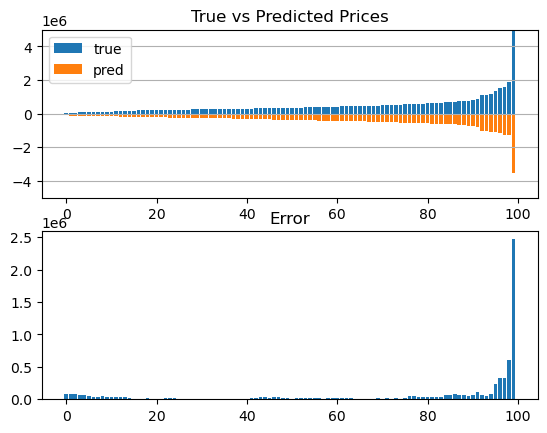

In [177]:
fig, axs= plt.subplots(2)

n = 100
y_test_sample = np.random.choice(y_test, n, replace = False)
y_pred_sample = np.random.choice(y_pred, n, replace = False)

y_test_sample.sort()
y_pred_sample.sort()

axs[0].set_title('True vs Predicted Prices')
axs[0].bar(np.arange(y_test_sample.shape[0]), y_test_sample, label='true')
axs[0].bar(np.arange(y_test_sample.shape[0]), -y_pred_sample, label='pred')
axs[0].set_ylim(-0.5e7, 0.5e7)
axs[0].legend()
axs[0].grid(axis='y')

axs[1].set_title('Error')
axs[1].bar(np.arange(y_test_sample.shape[0]), np.abs(y_test_sample-y_pred_sample), label='true')